<a href="https://colab.research.google.com/github/goktuggokmen/clustering/blob/main/Uygulama_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>EEM 314 Veri Madenciliğine Giriş</font>**
# **<font color='red'>Uygulama 8 : Clustering</font>**

# **<font color='black'>1. Kütüphanelerin Yüklenmesi</font>**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import math
import random as rd
from scipy.spatial import distance
np.set_printoptions(precision=5, suppress=True)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# **<font color='black'>2. Verinin Dosyadan Okunması</font>**

In [ ]:
data = pd.read_csv('/content/clustering_toy_data.csv')

In [ ]:
data

,x,y
0,-0.200303,0.510281
1,-0.326642,-0.922599
2,-0.020885,-1.822650
3,-0.796312,0.618746
4,-1.290430,-1.055020
...,...,...
95,2.510740,-3.331230
96,2.424170,-2.143370
97,2.915710,-2.911060
98,2.414640,-3.687660


In [ ]:
data.describe()

,x,y
count,100.000000,100.000000
mean,2.234540,-0.982191
std,1.736939,2.274899
min,-2.097190,-4.446130
25%,1.533445,-2.999865
50%,2.795660,-1.389810
75%,3.398598,1.353628
max,5.522210,3.336960


In [ ]:
X = data.iloc[:, [0, 1]].values

# **<font color='black'>3. Kümeleme algoritmaları</font>**

# **<font color='silver'>a. Iterative k-means Clustering Algoritması</font>**

In [ ]:
m=X.shape[0] #eğitim örneği sayısı
n=X.shape[1] #özellik sayısı
n_iter=100

In [ ]:
K=5 #küme sayısı

In [ ]:
Centroids=np.array([]).reshape(n,0) #centroidleri veri noktalarından rastgele başlatır.

In [ ]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Her eğitim örneği için merkezden öklid mesafesini hesaplayıp kümeyi minimum mesafeye göre atıyoruz.

In [ ]:
Output={}

In [ ]:
#her noktadan tüm merkezlere olan öklid mesafesini buluyoruz ve bir m X K matrisinde saklıyoruz
#böylece EuclidianDistance matrisindeki her satır, tüm merkezlerden o belirli veri noktasının mesafelerine sahip olacaktır.
#ardından, minimum mesafeyi bulacağız ve sütunun indeksini bir C vektöründe saklayacağız.
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
#C küme indeksine dayalı olarak veri noktalarını yeniden gruplandırmamız ve Çıktı sözlüğünde saklamamız ve ayrıca ayrılmış kümelerin ortalamasını hesaplamamız ve onu yeni merkezler olarak atamamız gerekiyor.
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
#yakınsama sağlanana kadar aynı işlemler tekrarlanır.
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

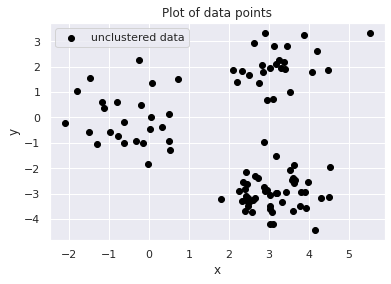

In [ ]:
#kümelenmemiş veriyi görselleştiriyoruz.
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Plot of data points')
plt.show()

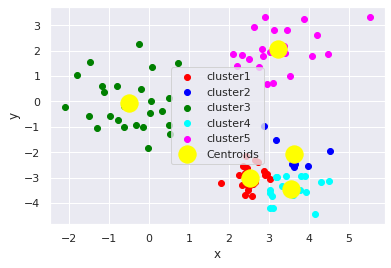

In [ ]:
#kümelenmiş verinin görselleştirilmesi.
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# **<font color='silver'>b. Single Linkage Algoritması</font>**

In [ ]:
c1 = pd.read_csv("/content/clustering_toy_data.csv", names=['x0', 'x1'])

In [ ]:
def single_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for point_id,point in enumerate(cluster): 
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    for point2_id, point2 in enumerate(cluster2):
                        if distance.euclidean(point,point2) < closest_distance: 
                            closest_distance = distance.euclidean(point,point2)
                            clust_1 = cluster_id
                            clust_2 = cluster2_id+cluster_id+1
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2) 
    return(clusters)

In [ ]:
def hierarchical(data, cluster_num, metric = 'single'):
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

In [ ]:
clusters = hierarchical(c2,2)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

NameError: ignored

# **<font color='silver'>c. Complete Linkage Algoritması</font>**

In [ ]:
c2 = pd.read_csv("/content/clustering_toy_data.csv", names=['x0', 'x1'])

In [ ]:
def complete_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = -1

                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):

                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)

                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1

        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 

        clusters.pop(clust_2) 
    return(clusters)

In [ ]:
def hierarchical(data, cluster_num, metric = 'complete'):
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'complete':
        return complete_distance(init_clusters, cluster_num)

In [ ]:
clusters = hierarchical(c2,4)
colors = ['green', 'purple', 'teal', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])